In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv("Group_17_data_cleaned.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [90]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# convert date/time strings to timestamps
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**9  # convert to seconds

# extract feature matrix X and target vector y
X = df.drop('Usage_kWh', axis=1)
y = df['Usage_kWh']



Text(0, 0.5, 'WCSS')

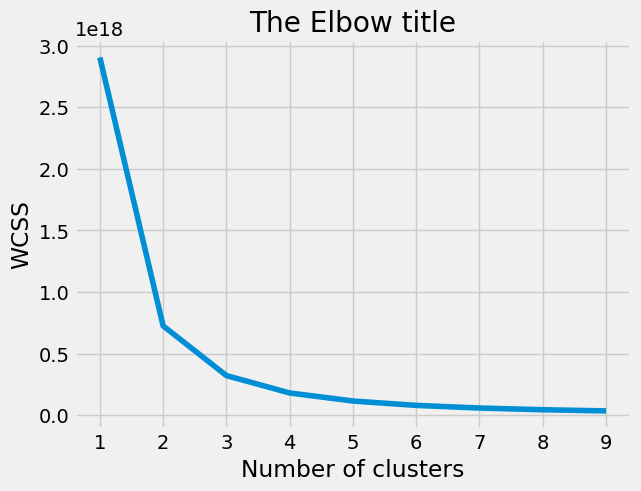

In [91]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
 kmeans = KMeans(i)
 kmeans.fit(X)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

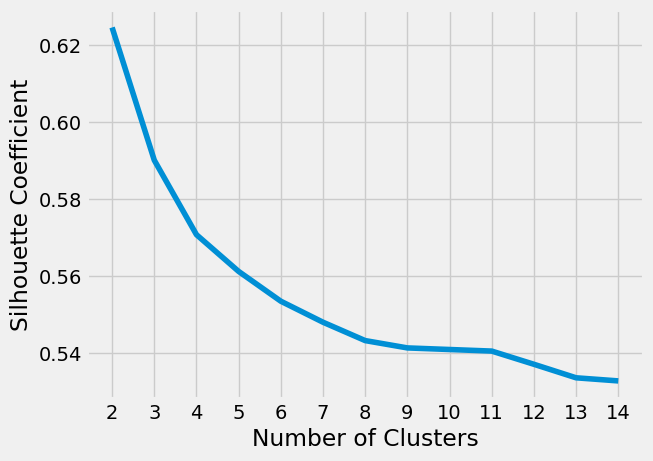

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.5, random_state=42)

silhouette_coefficients = []

kmeans_kwargs= {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#Best K=3

In [132]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

In [133]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [134]:
df['clusters'] = y_kmeans
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load,clusters
0,1514765700,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0,1
1,1514766600,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0,1
2,1514767500,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0,1
3,1514768400,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0,1
4,1514769300,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0,1


In [135]:
df['clusters'].unique()

array([1, 2, 0], dtype=int32)

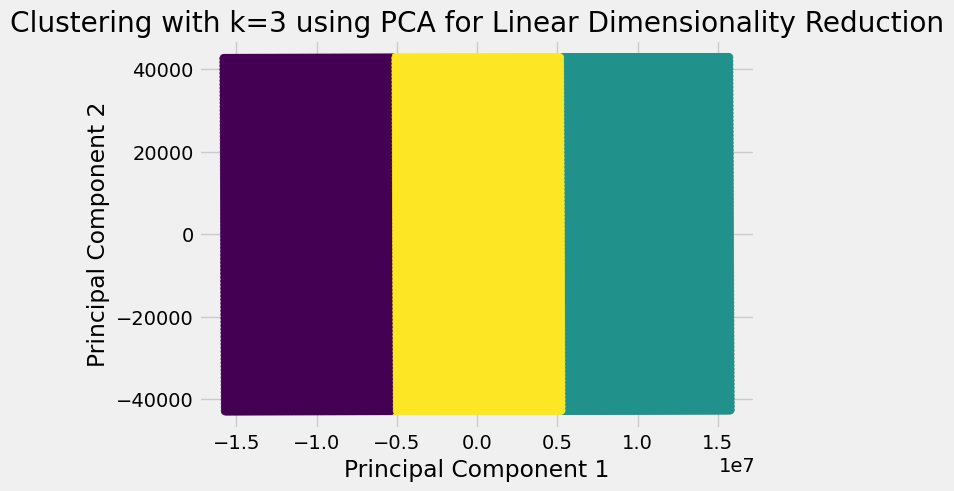

In [136]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Perform PCA for linear dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title("Clustering with k=3 using PCA for Linear Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Selecting top 2 features

In [137]:
df_1=df[['date','Lagging_Current_Reactive_Power_kVarh']]

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(df_1[['date']])
df_1['date']=model.transform(df_1[['date']])
scaler = MinMaxScaler()
mol = scaler.fit(df_1[['Lagging_Current_Reactive_Power_kVarh']])
df_1['Lagging_Current_Reactive_Power_kVarh'] = mol.transform(df_1[['Lagging_Current_Reactive_Power_kVarh']])

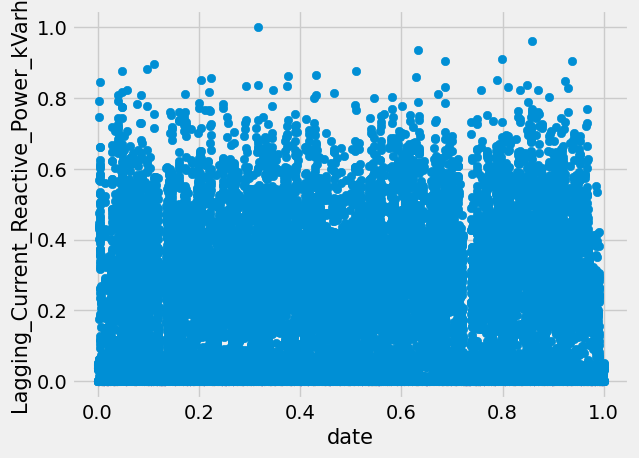

In [139]:
plt.scatter(df_1['date'], df_1['Lagging_Current_Reactive_Power_kVarh'])
plt.xlabel('date', fontsize=15)
plt.ylabel('Lagging_Current_Reactive_Power_kVarh', fontsize=15);

In [140]:
X1 = df_1[['date','Lagging_Current_Reactive_Power_kVarh']]

Text(0, 0.5, 'WCSS')

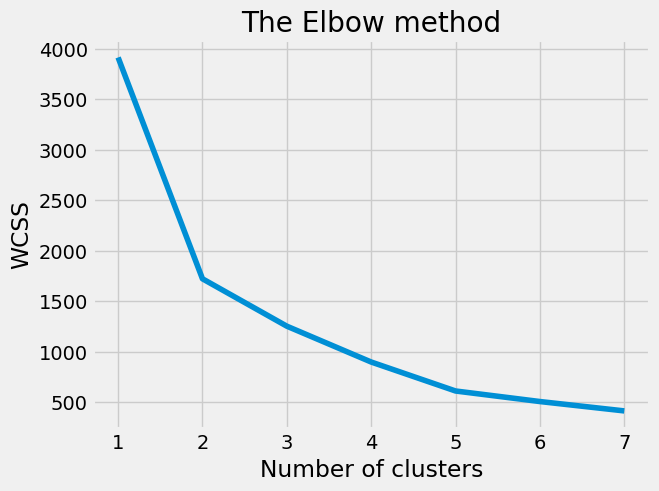

In [141]:
# Finding number of custers using the elbow method
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(X1)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [142]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X1)

In [143]:
cluster = kmeans.predict(X1)
cluster

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [144]:
df_1['Cluster'] = cluster
df_1

,date,Lagging_Current_Reactive_Power_kVarh,Cluster
0,0.000029,0.030441,3
1,0.000057,0.046022,3
2,0.000086,0.033846,3
3,0.000114,0.036735,3
4,0.000143,0.046435,3
...,...,...,...
35035,0.999914,0.050150,2
35036,0.999943,0.038593,2
35037,0.999971,0.032711,2
35038,1.000000,0.031576,2


In [145]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [146]:
kmeans.cluster_centers_

array([[0.60402496, 0.43428097],
       [0.48175576, 0.05315486],
       [0.83629065, 0.06820302],
       [0.15537018, 0.12525043]])

In [150]:
df_1['date']

0        0.000029
1        0.000057
2        0.000086
3        0.000114
4        0.000143
           ...   
35035    0.999914
35036    0.999943
35037    0.999971
35038    1.000000
35039    0.997289
Name: date, Length: 35040, dtype: float64

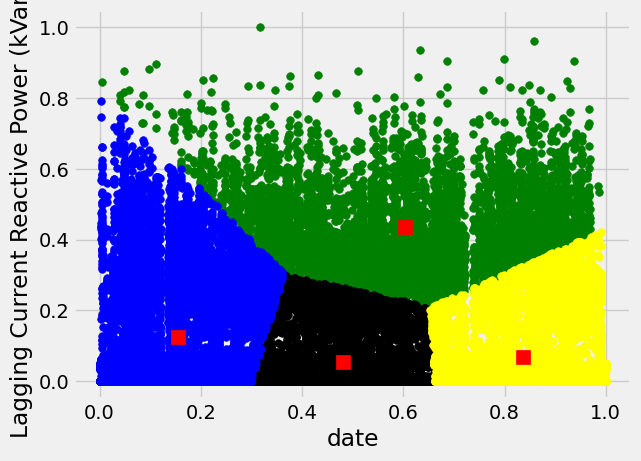

In [147]:
labels = [0, 1, 2, 3]
colors = ["green", "black", "yellow", "blue"]

for label, color in zip(labels, colors):
    index = df_1["Cluster"] == label
    plt.scatter(df_1.loc[index, "date"],
                df_1.loc[index, "Lagging_Current_Reactive_Power_kVarh"],
                c=color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="s", s=100)
plt.xlabel("date")
plt.ylabel("Lagging Current Reactive Power (kVarh)")
plt.show()
